K Means Clustering 

In [94]:
# Import required Python packages
from sklearn.cluster import KMeans 
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt

In [95]:
######################################################
# create the data
######################################################
# Import sample data
data_path = "C:/Users/eacalder/Documents/Education/DataScienceInfinity/Leasson_Downloads/ABTesting/grocery_database.xlsx"
product_areas = pd.read_excel(data_path, sheet_name = 'product_areas') 
transactions = pd.read_excel(data_path, sheet_name = 'transactions') 
print(transactions.shape)
transactions.head()

(38506, 6)


,customer_id,transaction_date,transaction_id,product_area_id,num_items,sales_cost
0,1,2020-04-10,435657533999,3,7,19.16
1,1,2020-04-10,435657533999,2,5,7.71
2,1,2020-06-02,436189770685,4,4,26.97
3,1,2020-06-02,436189770685,1,2,38.52
4,1,2020-06-10,436265380298,4,4,22.13


In [96]:
print(product_areas.shape)
product_areas.head()

(5, 3)


,product_area_id,product_area_name,profit_margin
0,1,Non-Food,0.25
1,2,Vegetables,0.18
2,3,Fruit,0.14
3,4,Dairy,0.19
4,5,Meat,0.11


In [97]:
# merge on product area name
transactions = pd.merge(transactions, 
                        product_areas, 
                        how='inner',
                        on = 'product_area_id'
                        )
transactions.head()

,customer_id,transaction_date,transaction_id,product_area_id,num_items,sales_cost,product_area_name,profit_margin
0,1,2020-04-10,435657533999,3,7,19.16,Fruit,0.14
1,1,2020-07-20,436667313620,3,8,19.99,Fruit,0.14
2,1,2020-07-22,436686191960,3,20,61.69,Fruit,0.14
3,1,2020-08-12,436899350757,3,16,52.28,Fruit,0.14
4,1,2020-08-13,436908803653,3,14,34.58,Fruit,0.14


In [98]:
# drop non food category 
transactions.drop(transactions[transactions['product_area_name']=='Non-Food'].\
                  index,inplace=True)
transactions.head(30)

,customer_id,transaction_date,transaction_id,product_area_id,num_items,sales_cost,product_area_name,profit_margin
0,1,2020-04-10,435657533999,3,7,19.16,Fruit,0.14
1,1,2020-07-20,436667313620,3,8,19.99,Fruit,0.14
2,1,2020-07-22,436686191960,3,20,61.69,Fruit,0.14
3,1,2020-08-12,436899350757,3,16,52.28,Fruit,0.14
4,1,2020-08-13,436908803653,3,14,34.58,Fruit,0.14
5,1,2020-08-14,436913894011,3,21,63.31,Fruit,0.14
6,1,2020-08-28,437054306208,3,6,24.99,Fruit,0.14
7,2,2020-04-15,435703814216,3,13,44.57,Fruit,0.14
8,2,2020-06-19,436357605508,3,5,10.27,Fruit,0.14
9,2,2020-06-22,436389036591,3,12,24.68,Fruit,0.14


In [99]:
# aggragate sales at customer level (by product area)
transactions_summary = transactions.\
                        groupby(['customer_id',
                                 'product_area_name'])['sales_cost'].\
                        sum().\
                        reset_index()

transactions_summary.head()

,customer_id,product_area_name,sales_cost
0,1,Dairy,367.74
1,1,Fruit,276.00
2,1,Meat,543.38
3,1,Vegetables,167.12
4,2,Dairy,150.63


In [100]:
# pivot data to place product areas as columns 
transactions_summary_pivot = transactions.\
                            pivot_table(index='customer_id',
                                        columns='product_area_name',
                                        values='sales_cost',
                                        aggfunc='sum',
                                        fill_value=0, # values to replace missing value with
                                        margins=True, # we want a total column to convert to percentages
                                        margins_name='Total').rename_axis(None,axis=1) #allows us to give a name total
# we dont end up with both product area name and customer id in pivot
transactions_summary_pivot.head()

,Dairy,Fruit,Meat,Vegetables,Total
customer_id,,,,,
1,367.74,276.00,543.38,167.12,1354.24
2,150.63,120.93,241.21,99.05,611.82
3,46.20,75.39,171.13,31.50,324.22
4,341.91,245.36,272.79,142.35,1002.41
5,694.71,815.32,1405.19,350.10,3265.32


In [101]:
#turn sales into percentages rather than raw sales
transactions_summary_pivot = transactions_summary_pivot.\
                                div(transactions_summary_pivot['Total'], #divides all dataframe by certain value
                                    axis=0) # we want at row level or customer level
# transactions_summary_pivot_y = pd.DataFrame(transactions_summary_pivot['Total'])
transactions_summary_pivot.head()

,Dairy,Fruit,Meat,Vegetables,Total
customer_id,,,,,
1,0.271547,0.203804,0.401244,0.123405,1.0
2,0.246200,0.197656,0.394250,0.161894,1.0
3,0.142496,0.232527,0.527821,0.097156,1.0
4,0.341088,0.244770,0.272134,0.142008,1.0
5,0.212754,0.249691,0.430338,0.107218,1.0


In [102]:
# drop the total column cause we dont need for clustering
data_for_clustering = transactions_summary_pivot.\
                        drop(['Total'],
                             axis=1)
data_for_clustering.head()

,Dairy,Fruit,Meat,Vegetables
customer_id,,,,
1,0.271547,0.203804,0.401244,0.123405
2,0.246200,0.197656,0.394250,0.161894
3,0.142496,0.232527,0.527821,0.097156
4,0.341088,0.244770,0.272134,0.142008
5,0.212754,0.249691,0.430338,0.107218


In [103]:
######################################################
# data preparation and cleaning
######################################################
# check for missing values
data_for_clustering.isna().sum()

Dairy         0
Fruit         0
Meat          0
Vegetables    0
dtype: int64

In [104]:
# normilise data scale our data
# our data is now in percentages meaning that they are between 0->1 how ever 
# i still run this because a product area might commonly make up a large portion 
# of the customer sales and might dominate the clustering space if we normalise 
# our smaller areas will evenly distribute
scale_norm = MinMaxScaler()
data_for_clustering_scaled = pd.DataFrame(scale_norm.\
                                          fit_transform(data_for_clustering),
                                          columns=data_for_clustering.columns)
data_for_clustering_scaled.head()
# why create new data_for_clustering_scaled. i want to scale with when clustring 
# and then 
# use the data_for_clustering for profiling each cluster so use actual values


,Dairy,Fruit,Meat,Vegetables
0,0.309044,0.250873,0.432358,0.164665
1,0.280196,0.243305,0.424823,0.216022
2,0.162172,0.286229,0.568751,0.129640
3,0.388187,0.301300,0.293237,0.189487
4,0.242132,0.307357,0.463709,0.143065


In [105]:
transactions_summary_pivot.info()
# transactions_summary_pivot_y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 871 entries, 1 to Total
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dairy       871 non-null    float64
 1   Fruit       871 non-null    float64
 2   Meat        871 non-null    float64
 3   Vegetables  871 non-null    float64
 4   Total       871 non-null    float64
dtypes: float64(5)
memory usage: 40.8+ KB


In [106]:
# plt.style.use("seaborn-poster")
# plt.scatter(transactions_summary_pivot['Dairy','Fruit','Meat','Vegetables'], transactions_summary_pivot_y['Total'])
# plt.title('K-Mean Clustering Visual')
# plt.xlabel('Products')
# plt.ylabel('Total')
# plt.tight_layout()

In [107]:
# what value do i want for K?
######################################################
# Use WCSS to find a good value for k
######################################################
k_values = list(range(1,10))
print(k_values)
wcss_list = []

[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [108]:
for k in k_values:
    kmeans = KMeans(n_clusters = k,
                    random_state=42)
    kmeans.fit(data_for_clustering_scaled)
    wcss_list.append(kmeans.inertia_)
print(wcss_list)
print(kmeans)

c:\Users\eacalder\.conda\envs\DSInfinity\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\eacalder\.conda\envs\DSInfinity\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\eacalder\.conda\envs\DSInfinity\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\eacalder\.conda\envs\DSInfinity\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

[91.72882312884767, 43.92215800997556, 29.06428651225431, 23.33903474707163, 19.821624364799636, 17.999966191836016, 16.557054748043225, 15.13616920161499, 13.840501593608975]
KMeans(n_clusters=9, random_state=42)


c:\Users\eacalder\.conda\envs\DSInfinity\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\eacalder\.conda\envs\DSInfinity\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


C:\Users\eacalder\AppData\Local\Temp\1/ipykernel_14420/2459161974.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-poster")


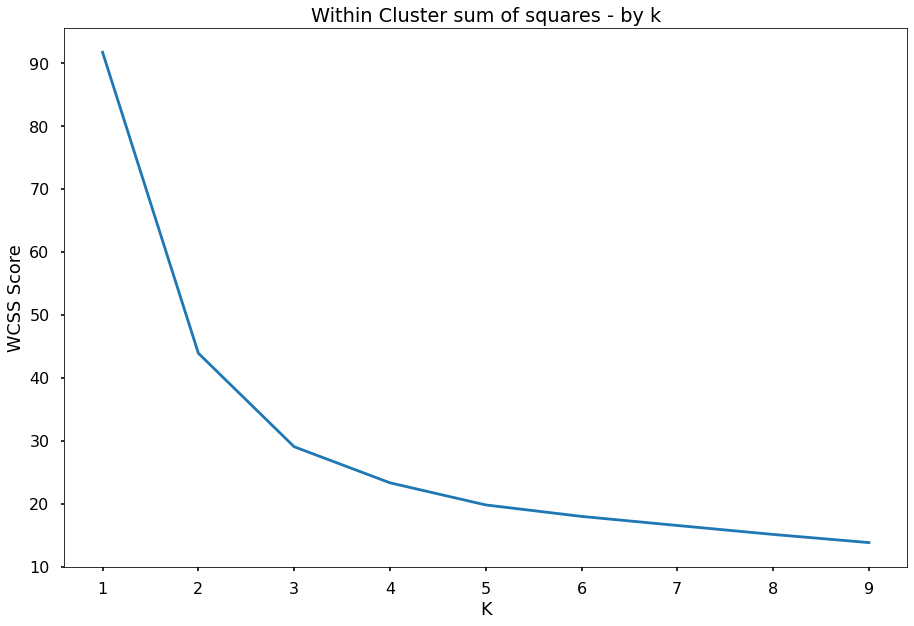

In [109]:
# plot for good value for K
plt.style.use("seaborn-poster")
plt.plot(k_values, wcss_list)
plt.title('Within Cluster sum of squares - by k')
plt.xlabel('K')
plt.ylabel('WCSS Score')
plt.tight_layout()
plt.show()


Maybe 3 clusters ? 

In [110]:
######################################################
# instantiate and fit model
######################################################
kmeans = KMeans(n_clusters = 3,
                random_state=42)
kmeans.fit(data_for_clustering_scaled)

c:\Users\eacalder\.conda\envs\DSInfinity\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [111]:
######################################################
# Use cluster information
######################################################

# add cluster labels to our data
data_for_clustering['cluster']= kmeans.labels_

In [112]:
data_for_clustering.head(10)

,Dairy,Fruit,Meat,Vegetables,cluster
customer_id,,,,,
1,0.271547,0.203804,0.401244,0.123405,0
2,0.246200,0.197656,0.394250,0.161894,0
3,0.142496,0.232527,0.527821,0.097156,0
4,0.341088,0.244770,0.272134,0.142008,0
5,0.212754,0.249691,0.430338,0.107218,0
6,0.180452,0.177647,0.546483,0.095419,0
7,0.000000,0.517055,0.000000,0.482945,1
8,0.293497,0.322045,0.342859,0.041599,0
9,0.283465,0.434141,0.187015,0.095380,2


In [113]:
# check for clustter size 
data_for_clustering['cluster'].value_counts()
# no right or wrong just shows that there are distinct types of cluster behavior
# you can profile the clusters to vuew summary and statistics 


0    641
2    127
1    103
Name: cluster, dtype: int64

In [114]:
# Plot our clusters and centroids
centroids = kmeans.cluster_centers_
print(centroids)

[[0.25137465 0.32571585 0.4057049  0.18415446]
 [0.00271105 0.78509507 0.00398274 0.47519383]
 [0.41420375 0.48518081 0.03147487 0.28380203]]


In [115]:
######################################################
# profile our cluster 
######################################################
cluster_summary = data_for_clustering.\
                    groupby('cluster')[['Dairy',
                                        'Fruit',
                                        'Meat',
                                        'Vegetables']].\
                    mean().\
                    reset_index()
cluster_summary.head()
# looking at cluster 0 and 2 seems to be accross the board
# cluster 1 leans towards fruit
# vegan customers?


,cluster,Dairy,Fruit,Meat,Vegetables
0,0,0.220875,0.264605,0.376508,0.138011
1,1,0.002382,0.637796,0.003696,0.356126
2,2,0.363948,0.394152,0.029210,0.212690


am actually surprised how cleanly this came out usually there is alot of back and forth until data is very understood of the customer patterns